In [43]:
import pandas as pd
import numpy as np
from causalimpact import CausalImpact
import csv
import sys
from datetime import datetime
import dtw

principal variables:
test set
up to 5 initial like-for-like csv datasets
metric to aggregate by in a str
rolling window
min number of time periods in markets (find best recommended)
min number of time periods in test set (find best recommended)

optional:
queries to be excuded in a list (possibly)
countries
outlier cutoff

returns a csv ready to find matching markets

actions on transform():
check column names
get test_set, test it is not empty
groupby, sum/mean
filter by test_set
rename test markets to 'test'
groupby, sum/mean
    returns:
    one or many DataFrames if 'queries' or 'countries' non empty

principal variables:
intervention date in datetime
date start in datetime
date end in datetime
metric in str
test_and_control set in csv or xslx, 
dataset in csv or xslx,
  optional:
  alpha
  events per season
  number of seasons
  backtest periods
  standardize

actions on fit():
check column names
check all dates are type datetime
sort by date
rename BestControl if found
check for issues with page names
append 'test' to page column
merge
pivot
find partition 1 and 2
drop date
check column order, find and place 'test' column
run causal impact with data imputed above
    returns:
    CausalImpact object

In [217]:
noadi = pd.read_csv('C:/Users/akiro/Documents/Adidas/USA/us_test_06_pdp_titles_categories/data/outputs/position_adi_long.csv')

In [216]:
noadi.groupby('page').sum()

,impressions,clicks,position
page,,,
https://www.adidas.com/us/-/GX1196.html,18,12,11.850000
https://www.adidas.com/us/-/S29038.html,1,1,27.000000
https://www.adidas.com/us/-sales-tax-holidays.html,21,16,31.500000
https://www.adidas.com/us/032c-backpack/H62025.html,66,33,44.574405
https://www.adidas.com/us/032c-campus-shoes/FX3495.html,16,13,36.500000
...,...,...,...
https://www.adidas.com/us/zx-torsion-shoes/EH0251.html,872,231,72.518000
https://www.adidas.com/us/zx-wavian-shoes/H03221.html,139,103,120.875000
https://www.adidas.com/us/zx-windbreaker/GN3642.html,13,9,10.000000


In [218]:
noadi

,date,page,value
0,2021-01-02,TEST,2.313638e+00
1,2021-01-02,https://www.adidas.com/us/climacool-vento-shoe...,1.918875e+00
2,2021-01-02,https://www.adidas.com/us/tresc-run-shoes/EG73...,5.000000e-01
3,2021-01-02,https://www.adidas.com/us/climalite-boxer-brie...,1.361111e+00
4,2021-01-02,https://www.adidas.com/us/trefoil-tee/CW0709.html,3.308542e+00
...,...,...,...
150391,2021-11-29,https://www.adidas.com/us/adilette-boost-slide...,1.500000e+00
150392,2021-11-29,https://www.adidas.com/us/adizero-8.0-cleats/F...,0.000000e+00
150393,2021-11-29,https://www.adidas.com/us/gazelle-shoes/B41645...,5.000000e-01
150394,2021-11-29,https://www.adidas.com/us/star-wars-mandaloria...,8.881784e-16


In [225]:
noadi.page.unique()[1]

'https://www.adidas.com/us/climacool-vento-shoes/FX7841.html'

In [230]:
markets = {}

for i in noadi[['page']].page.unique():
    markets[i] = noadi[noadi.page == i].sort_values('date').reset_index(drop=True)[['value']]

In [233]:
distances = {}
for i in noadi[['page']].page.unique():
    distances[i] = dtw.dtw(markets['TEST'], markets[i]).distance
    print(distances[i])

0.0
288.2772667626293
349.38805881672863
354.348465549263
399.46917111384147
267.5448067422429
415.1676928478575
378.415310005025
1042.37810776343
474.21947746903726
413.24269609173695
420.02275098529776
460.9939211799504
367.593829552246
372.5991161956538
353.2560701493868
543.733376693689
213.88633041264885
475.1895640754126
373.76182674434506
233.85253210204266
535.9694084574744
520.614309657692
297.6398681443868
1091.6251993101155
379.2372341772026
443.0905372241855
366.1995463261119
478.3694691983017
262.5453743053173
270.778238901394
433.60082138385934
418.25467955338144
356.4874472148109
304.889590686693
346.96986077550486
235.54340762592452
364.9542374790947
418.6623677230136
714.060431468333
435.4184652766467
345.4971262069978
695.0146631235384
525.0287297545124
331.7972918835806
295.2438416253994
370.96067054553276
127.66807709361468
528.4239879480726
180.44474047734403
232.82222768902943
336.85163565649935
398.3623134935758
615.4466325966813
257.1338820060988
297.72983722240

In [234]:
df1 = pd.DataFrame.from_dict(distances, orient='index', columns=['A']).reset_index().sort_values('A')

In [334]:
data.page.nunique()

51591

In [347]:
pdp = pd.read_excel('C:/Users/akiro/Documents/Adidas/Europe/eu_test_08_plp_btf_content/data/inputs/PLPs.xlsx')
pdp = pdp[pdp.split == 'TEST']
pdp

,page,split,Target Keyword,Unnamed: 3
0,adidas.de/essentials-t_shirts,TEST,essentials t shirt,NaN
2,adidas.de/blau-adilette,TEST,adiletten hellblau,NaN
3,adidas.de/kurze_tights,TEST,kurze sport leggings,NaN
4,adidas.de/kinder-disney,TEST,mickey mouse schuhe,NaN
7,adidas.de/kinder-klettverschluss-schuhe,TEST,kinderschuhe mit klettverschluss,NaN
8,adidas.de/rosa-babys_0_1_jahr,TEST,baby rosa,NaN
9,adidas.de/kinder-trikots-outlet,TEST,kindertrikots,NaN
11,adidas.de/camouflage,TEST,camouflage trainingsanzug,NaN
12,adidas.de/chunky_sneakers-manner,TEST,chunky sneaker herren,NaN
14,adidas.de/frauen-nahtlos-leggings,TEST,nahtlose leggings,NaN


In [364]:
pdp = pd.read_excel('C:/Users/akiro/Documents/Adidas/USA/us_test_06_pdp_titles_categories/data/inputs/pdps.xlsx')

In [365]:
data1 = pd.read_csv('C:/Users/akiro/Documents/Adidas/USA/us_test_06_pdp_titles_categories/data/inputs/us_2021_11.csv')
data2 = pd.read_csv('C:/Users/akiro/Documents/Adidas/USA/us_test_06_pdp_titles_categories/data/inputs/bq-all.csv')
data1 = data1.groupby(['date','page']).sum().reset_index()
data1 = data1[['date', 'page', 'impressions']]
data2 = data2[['date', 'page', 'impressions']]

In [366]:
data = pd.concat([data1,data2], ignore_index=True).sort_values('date')

In [367]:
data

,date,page,impressions
664585,2021-01-01,https://www.adidas.com/us/y-3-cl-logo-hoodie/F...,1
1301551,2021-01-01,https://www.adidas.com/us/superstar-shoes/FW25...,8
1301550,2021-01-01,https://www.adidas.com/us/stan-smith-shoes/FW2...,5
1301549,2021-01-01,https://www.adidas.com/us/galaxy-4-shoes/F3616...,8
1085651,2021-01-01,https://www.adidas.com/us/marvel-spider-man-fo...,3
...,...,...,...
218365,2021-11-29,https://www.adidas.com/us/grand-court-base-sho...,5
218364,2021-11-29,https://www.adidas.com/us/grand-court-base-bey...,1
218363,2021-11-29,https://www.adidas.com/us/grand-court-base-bey...,4
218375,2021-11-29,https://www.adidas.com/us/grand-court-shoes/EF...,1


In [368]:
pdp

,Page,Status Code,Categories,Current Title,New Title
0,https://www.adidas.com/us/superstar-shoes/FV32...,200,Women's & Originals,Women's Superstar Cloud White and Core Black S...,Women's Superstar Cloud White and Core Black S...
1,https://www.adidas.com/us/superstar-shoes/EG49...,200,Originals,Superstar All Black Shoes | adidas US,Superstar All Black Shoes | Originals | adida...
2,https://www.adidas.com/us/nizza-platform-shoes...,200,Women's & Originals,adidas Nizza Platform Shoes - Black | adidas US,adidas Nizza Platform Shoes - Black | Women's...
3,https://www.adidas.com/us/terrex-free-hiker-go...,200,Men's & TERREX,adidas Terrex Free Hiker Gore-Tex Hiking Shoes...,adidas Terrex Free Hiker Gore-Tex Hiking Shoes...
4,https://www.adidas.com/us/lite-racer-adapt-3.0...,200,Men's & Essentials,adidas Lite Racer Adapt 3.0 Shoes - Black | ad...,adidas Lite Racer Adapt 3.0 Shoes - Black | M...
...,...,...,...,...,...
144,https://www.adidas.com/us/alphaskin-traxion-li...,200,Men's & Training,adidas Alphaskin Traxion Lightweight Cushioned...,adidas Alphaskin Traxion Lightweight Cushioned...
145,https://www.adidas.com/us/loungewear-essential...,200,Women's & Essentials,adidas LOUNGEWEAR Essentials High-Waisted Logo...,adidas LOUNGEWEAR Essentials High-Waisted Logo...
146,https://www.adidas.com/us/cycling-shorts/FM568...,200,Girls & Originals,adidas Cycling Shorts - Black | adidas US,adidas Cycling Shorts - Black | Girls & Origi...
147,https://www.adidas.com/us/superstar-up-shoes/F...,200,Women's & Originals,adidas Superstar Up Shoes - White | adidas US,adidas Superstar Up Shoes - White | Women's &...


In [423]:
def distance(testset=pd.DataFrame(), dataset=pd.DataFrame(), metric='str',
              col='page', roll=2, min_test=320, min_data=300, metric2='sum'):

    testset.columns = testset.columns.str.lower()
    dataset.columns = dataset.columns.str.lower()
    col = col.lower()
    
    assert testset[col].name == testset[col].name, 'Column names must match for the matched markets'
    
    causal_input = dataset
    
    test = causal_input[causal_input[col].isin(testset[col])]
    
    print(test.iloc[1,:])
    
    assert (test.iloc[1,:].all() != None)  & (test.iloc[0,:].all() != None), 'No markets match on test and data, check strings'

    testcount = test.groupby([col]).count().sort_values(metric, ascending=False).reset_index()

    test_tops = testcount[testcount['date'] > min_test].reset_index()

    causal_input.loc[causal_input[col].isin(test_tops[col]), col] = 'TEST'
    
    causal_input = causal_input.groupby(['date', col]).sum().sort_values(metric, ascending=False).reset_index()
    
    marketcount = causal_input.groupby([col]).count().sort_values(metric, ascending=False).reset_index()
    
    control_urls = marketcount[marketcount['date'] > min_data].reset_index() #suspicios
    
    causal_control = causal_input.loc[causal_input[col].isin(control_urls[col]),]

    pvt_table = causal_control.pivot_table(index='date', columns=col, values=metric, aggfunc=metric2).reset_index().fillna(0).set_index('date')

    pvt_table = pvt_table.rolling(roll).mean()

    pvt_table = pvt_table[roll-1:]

    causal_control = pvt_table.melt(ignore_index=False).reset_index().sort_values('date').reset_index(drop=True)

    markets = {}
    for i in causal_control[[col]][col].unique():
        markets[i] = causal_control[causal_control[col] == i].sort_values('date').reset_index(drop=True)[['value']]

    distances = {}
    for i in causal_control[[col]][col].unique():
        distances[i] = dtw.dtw(markets['TEST'], markets[i]).distance
        
    final = pd.DataFrame.from_dict(distances, orient='index', columns=['dist']).sort_values('dist')[1:].reset_index()

    return  final

In [424]:

temp = distance(testset = pdp,
               dataset= data,
               metric= 'impressions' ,
               col= 'page',
                metric2 = 'sum',
                min_test=200,
                min_data=325,
               )

date                                                  2021-01-01
page           https://www.adidas.com/us/runfalcon-2.0-tr-sho...
impressions                                                    2
Name: 496204, dtype: object


In [426]:
temp

,index,dist
0,https://www.adidas.com/us/adilette-shower-slid...,13282952.0
1,https://www.adidas.com/us/adilette-slides/2806...,19895140.5
2,https://www.adidas.com/us/superstar-shoes/EG49...,28312198.5
3,https://www.adidas.com/us/terrex-agravic-tr-go...,39989648.0
4,https://www.adidas.com/us/gazelle-shoes/BB5476...,41857763.5
5,https://www.adidas.com/us/kaptir-shoes/EE9513....,44444788.0
6,https://www.adidas.com/us/ozweego-shoes/EE6999...,46893459.0
7,https://www.adidas.com/us/superstar-shoes/EG49...,47610022.0
8,https://www.adidas.com/us/how-do-i-contact-adi...,47946561.5
9,https://www.adidas.com/us/adilette-comfort-sli...,47974816.5


In [359]:
%%time
temp = distance(testset = pdp,
               dataset= data,
               metric= 'impressions' ,
               col= 'page',
                metric2 = 'sum',
                min_test=200,
                min_data=325,
               )

Wall time: 8min 8s


In [357]:
%%time
temp = distance(testset = pdp,
               dataset= data,
               metric= 'impressions' ,
               col= 'page',
                metric2 = 'sum',
                min_test=200,
                min_data=325,
               )
temp

Wall time: 8min 25s


,index,dist
0,adidas.cz/ultraboost,14380.5
1,adidas.se/barn-skor-outlet,14863.0
2,adidas.se/nmd-skor,14863.5
3,adidas.se/dam-nmd,14893.0
4,adidas.dk/born-sko-outlet,15126.0
...,...,...
4416,adidas.com/us/ultraboost,2284085.5
4417,adidas.com/us/sale,3279014.0
4418,adidas.com/us/women,5213797.5
4419,adidas.com/us/men,5275833.0


In [344]:
temp = distance(testset = pdp,
               dataset= data,
               metric= 'impressions' ,
               col= 'page',
                metric2 = 'sum'
               )
temp

,index,dist
0,https://www.adidas.com/us/adilette-shower-slid...,10320819.0
1,https://www.adidas.com/us/adilette-slides/2806...,12719746.0
2,https://www.adidas.com/us/superstar-shoes/EG49...,15833526.0
3,https://www.adidas.com/us/tiro-21-track-pants/...,26414054.0
4,https://www.adidas.com/us/terrex-agravic-tr-go...,26761190.5
...,...,...
109,https://www.adidas.com/us/samba-super-shoes/01...,34344351.5
110,https://www.adidas.com/us/five-ten-trailcross-...,34344635.5
111,https://www.adidas.com/us/terrex-eastrail-hiki...,34345247.0
112,https://www.adidas.com/us/vl-court-2.0-shoes/D...,34345768.5


In [339]:
data['page']

664585     https://www.adidas.com/us/y-3-cl-logo-hoodie/F...
1301551    https://www.adidas.com/us/superstar-shoes/FW25...
1301550    https://www.adidas.com/us/stan-smith-shoes/FW2...
1301549    https://www.adidas.com/us/galaxy-4-shoes/F3616...
1085651    https://www.adidas.com/us/marvel-spider-man-fo...
                                 ...                        
218365     https://www.adidas.com/us/grand-court-base-sho...
218364     https://www.adidas.com/us/grand-court-base-bey...
218363     https://www.adidas.com/us/grand-court-base-bey...
218375     https://www.adidas.com/us/grand-court-shoes/EF...
217605     https://www.adidas.com/us/daily-3.0-shoes/GV73...
Name: page, Length: 1497815, dtype: object

In [193]:
import pandas as pd
from sklearn import preprocessing

x = df1.A[1:].values
min_max_scaler = preprocessing.MaxAbsScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
df2 = pd.DataFrame(x_scaled)



In [252]:
pdp = pdp.rename({'Page':'page'},axis=1)

In [254]:
data

,date,page,impressions
664585,2021-01-01,https://www.adidas.com/us/y-3-cl-logo-hoodie/F...,1
1301551,2021-01-01,https://www.adidas.com/us/superstar-shoes/FW25...,8
1301550,2021-01-01,https://www.adidas.com/us/stan-smith-shoes/FW2...,5
1301549,2021-01-01,https://www.adidas.com/us/galaxy-4-shoes/F3616...,8
1085651,2021-01-01,https://www.adidas.com/us/marvel-spider-man-fo...,3
...,...,...,...
218365,2021-11-29,https://www.adidas.com/us/grand-court-base-sho...,5
218364,2021-11-29,https://www.adidas.com/us/grand-court-base-bey...,1
218363,2021-11-29,https://www.adidas.com/us/grand-court-base-bey...,4
218375,2021-11-29,https://www.adidas.com/us/grand-court-shoes/EF...,1


In [126]:
align = dtw.dtw(es, sk1)
align.distance

69874614.0

In [121]:
markets['sc-domain:adidas.gr']

,impressions
0,42239
1,54355
2,57106
3,63161
4,56705
...,...
329,84118
330,57730
331,61992
332,53678


In [98]:
dtw.dtw(sk, es)

DTW alignment object of size (query x reference): 334 x 334

In [106]:
align = dtw.dtw(es, sk1)
align.distance

69874614.0

In [92]:
sk1.tolist()

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [86]:
es1 = es.reset_index().pivot_table( columns='index', values='impressions', aggfunc='sum').reset_index().fillna(0).drop(['index'],axis=1)
sk1 = sk.reset_index().pivot_table( columns='index', values='impressions', aggfunc='sum').reset_index().fillna(0).drop(['index'],axis=1)

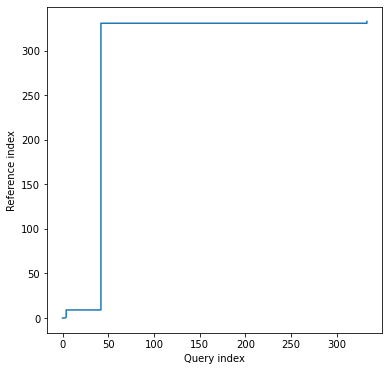

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [83]:
align.plot()